In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os

In [9]:

data = []
N=1000
folder = 'Results_0819/junk'
save_extension = 'Graphs_0819/Placc_psi100_moon_mass_migration_disk'
save = False  
#samples = [0,1,2,3,4,5]
samples = [0,1,2,3,4,8]
#samples = [0,4,5,6,7,8]
#samples = [0,1,2,3,4,5,6,7,8,9]
times = ["0 myr", "0.001 myr", "0.01 myr", "0.1 myr", "1 myr", "3 myr"]
#times = ["0 myr", "0.2 myr", "0.4 myr", "0.6 myr", "0.8 myr","1 myr"]
#times = ["0 myr", "0.001 myr", "0.01 myr", "0.1 myr", "0.2 myr", "0.4 myr", "0.6 myr", "0.8 myr","1 myr"]
files = os.listdir(os.path.join(os.getcwd(),"Data",folder))
with open(os.path.join(os.getcwd(),"Data",folder,files[0]),'r') as f:
    head_idx = 0
    lines = f.readlines()
    for i in range(len(lines)):
        if lines[-i-1].startswith('#'):
            print(i)
            head_idx = len(lines)-i-1
            break
    values = lines[head_idx-1].split()[1:]
    header = lines[head_idx].split()[1:]
    print(header)
for file in files:
    if '_' in file:
        data.append(pd.read_csv(os.path.join(os.getcwd(),"Data",folder,file),skiprows=head_idx+1,delim_whitespace=True,header=0))
        data[-1].columns = header

500
['R', 'Sigma', 'Sigma_G', 'Simga_DS', 'Sigma_DL', 'Sigma_P', 'T', 'Stokes_DS', 'Stokes_DL', 'epsilon[0]', 'epsilon[1]', 'epsilon[2]', 'a[0]', 'a[1]', 'a[2]', 'Mdot', 'MdotSS']


/tmp/ipykernel_2411906/3019260274.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data.append(pd.read_csv(os.path.join(os.getcwd(),"Data",folder,file),skiprows=head_idx+1,delim_whitespace=True,header=0))
/tmp/ipykernel_2411906/3019260274.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data.append(pd.read_csv(os.path.join(os.getcwd(),"Data",folder,file),skiprows=head_idx+1,delim_whitespace=True,header=0))
/tmp/ipykernel_2411906/3019260274.py:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data.append(pd.read_csv(os.path.join(os.getcwd(),"Data",folder,file),skiprows=head_idx+1,delim_whitespace=True,header=0))
/tmp/ipykernel_2411906/3019260274.py:28: FutureWarning: The 'delim_whitespace' 

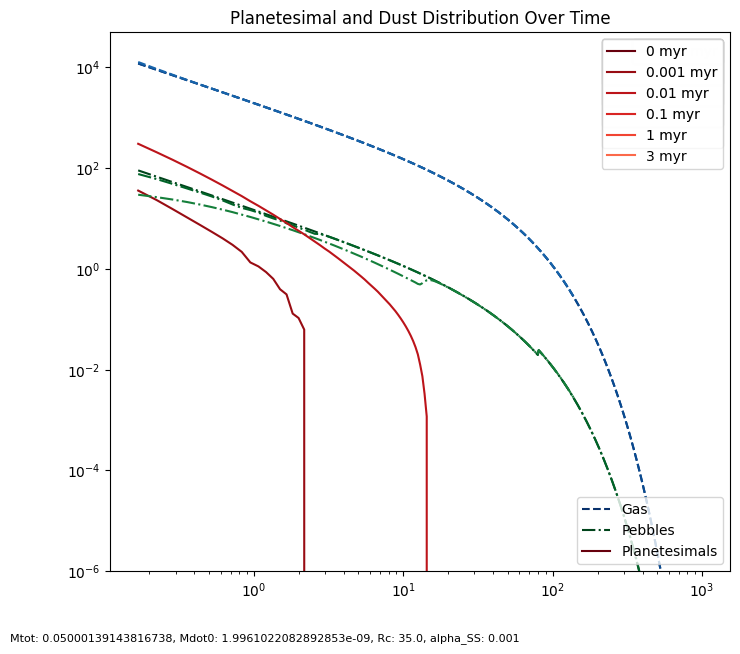

In [10]:
# Make 1 graph
fig, ax = plt.subplots(figsize=(8,7))
color=iter(plt.cm.Blues(np.linspace(0.5,1,len(times))[::-1]))
color2=iter(plt.cm.Greys(np.linspace(0.5,1,len(times))[::-1]))
color3=iter(plt.cm.Greens(np.linspace(0.5,1,len(times))[::-1]))
color4=iter(plt.cm.Reds(np.linspace(0.5,1,len(times))[::-1]))
for i in range(len(data)):
    if i in samples:
        c1 = next(color)
        c2 = next(color2)
        c3 = next(color3)
        c4 = next(color4)
        ax.loglog(data[i]["R"],data[i]["Sigma_G"],linestyle='dashed',c=c1,label = f'Gas_{i/1000} Myr')
        #ax.loglog(data[i]["R"],data[i]["Simga_DS"],linestyle='dotted',c=c2, label = f'Grains_{i/1000} Myr')
        ax.loglog(data[i]["R"],data[i]["Sigma_DL"],linestyle='dashdot',c=c3, label = f'Pebbles_{i/1000} Myr')
        #ax.loglog(data[i]["R"],data[i]["Simga_DS"]+data[i]["Sigma_DL"],linestyle='dotted',c=c2, label = f'Dust_{i/1000} Myr')
        ax.loglog(data[i]["R"],data[i]["Sigma_P"],linestyle='solid',c=c4, label = f'Planetesimals_{i/1000} Myr')
        ax.set_title("Planetesimal and Dust Distribution Over Time")
        ax.set_ylim((10e-7,5e4))
        handles, labels = ax.get_legend_handles_labels()
        time_handles, time_labels, pop_handles, pop_labels = [], [], [], []
        for i in range(len(labels)):
            pop, t= (labels[i].split("_"))
            if pop == 'Planetesimals':
                time_handles.append(handles[i])
                time_labels.append(t)
            if t == '0.0 Myr':
                pop_handles.append(handles[i])
                pop_labels.append(pop)
        tleg = ax.legend(time_handles,times,loc='upper right')
        pleg = plt.legend(pop_handles,pop_labels,loc='lower right')
        ax.add_artist(tleg)
fig.text(0,0.01," ".join(values), size = 8)
if save:
    plt.savefig(f"Graphs/{save_extension}")    
plt.show()

In [ ]:
# Plot grain sizes
fig, (ax1, ax2) = plt.subplots(2,figsize=(8,7))
color=iter(plt.cm.Blues(np.linspace(0.5,1,len(times))[::-1]))
color2=iter(plt.cm.Greys(np.linspace(0.5,1,len(times))[::-1]))
color3=iter(plt.cm.Greens(np.linspace(0.5,1,len(times))[::-1]))
color4=iter(plt.cm.Reds(np.linspace(0.5,1,len(times))[::-1]))
for i in range(len(data)):
    if i in samples:
        c1 = next(color)
        c2 = next(color2)
        c3 = next(color3)
        c4 = next(color4)
        ax1.loglog(data[i]["R"],data[i]["a[0]"],linestyle='dashed',c=c1,label = f'Grains_{i/1000} Myr')
        ax2.loglog(data[i]["R"],data[i]["a[1]"],linestyle='dashdot',c=c3, label = f'Pebbles_{i/1000} Myr')
        ax1.set_title("Grain Sizes Over Radius and Time")
        ax2.set_title("Pebble Sizes Over Radius and Time")
        #ax.set_ylim((10e-7,5e4))
        ax1.legend(times)
        ax2.legend(times)
fig.text(0,0.01," ".join(values), size = 8)
if save:
    plt.savefig(f"Graphs/{save_extension}_Grain_Size")    
plt.show()

In [ ]:
# Plot stokes numbers
fig, (ax1, ax2) = plt.subplots(2,figsize=(8,7))
color=iter(plt.cm.Blues(np.linspace(0.5,1,len(times))[::-1]))
color2=iter(plt.cm.Greys(np.linspace(0.5,1,len(times))[::-1]))
for i in range(len(data)):
    if i in samples:
        c1 = next(color)
        c2 = next(color2)
        ax1.loglog(data[i]["R"],data[i]["Stokes_DS"],linestyle='dashed',c=c1,label = f'Grains_{i/1000} Myr')
        ax2.loglog(data[i]["R"],data[i]["Stokes_DL"],linestyle='dashdot',c=c2, label = f'Pebbles_{i/1000} Myr')
        ax1.set_title("Grain Stokes Numbers Over Radius and Time")
        ax2.set_title("Pebble Stokes Numbers Over Radius and Time")
        #ax1.set_ylim((10e-3,1e3))
        #ax2.set_ylim((10e-3,1e3))
        ax1.legend(times)
        ax2.legend(times)
fig.text(0,0.01," ".join(values), size = 8)
if save:
    plt.savefig(f"Graphs/{save_extension}_Stokes_Numbers")    
plt.show()

In [ ]:
# Plot planet data 6 graph
folder = 'both_accretion_full_accfix'
df = pd.read_csv(os.path.join(os.getcwd(),'Data',"dusty_disc_300_planets_no_pl_Planet_Data"),delimiter = ' ')
fig, axs = plt.subplots(2,3,figsize=(15,10))
for i in range(10):
    axs[0,0].semilogy(df['Time'][i::10], df['Mp'][i::10]+df['Menv'][i::10])
    axs[0,0].set_title("Only Pebble Accretion")
    axs[0,0].set_xlabel("Time")
    axs[0,0].set_ylabel("Total Mass")
    axs[1,0].loglog(df['R'][i::10],df['Mp'][i::10]+df['Menv'][i::10])
    masses_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df['Time'][i::10],df['Mp'][i::10]+df['Menv'][i::10])
    radius_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df['Time'][i::10],df['R'][i::10])
    
    axs[1,0].loglog(radius_points,masses_points,'o',c='black',markersize=1)
    axs[1,0].set_title("Only Pebble Accretion")
    axs[1,0].set_xlabel("Radius (AU)")
    axs[1,0].set_ylabel("Total Mass")
axs[1,0].set_ylim((1e-2,1e4))

df2 = pd.read_csv(os.path.join(os.getcwd(),'Data',"both_accretion_full_Planet_Data"),delimiter = ' ')
for i in range(10):
    axs[0,1].semilogy(df2['Time'][i::10], df2['Mp'][i::10]+df2['Menv'][i::10])
    axs[0,1].set_title("Pebble and Planetesimal")
    axs[0,1].set_xlabel("Time")
    axs[0,1].set_ylabel("Total Mass")
    axs[1,1].loglog(df2['R'][i::10],df2['Mp'][i::10]+df2['Menv'][i::10])
    masses_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df2['Time'][i::10],df2['Mp'][i::10]+df2['Menv'][i::10])
    radius_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df2['Time'][i::10],df2['R'][i::10])
    
    axs[1,1].loglog(radius_points,masses_points,'o',c='black',markersize=1)
    axs[1,1].set_title("Pebble and Planetesimal")
    axs[1,1].set_xlabel("Radius (AU)")
    axs[1,1].set_ylabel("Total Mass")
axs[1,1].set_ylim((1e-2,1e4))
df3 = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder}_Planet_Data"),delimiter = ' ')
for i in range(10):
    axs[0,2].semilogy(df3['Time'][i::10], df3['Mp'][i::10]+df3['Menv'][i::10])
    axs[0,2].set_title("Only Planetesimal Accretion")
    axs[0,2].set_xlabel("Time")
    axs[0,2].set_ylabel("Total Mass")
    axs[1,2].loglog(df3['R'][i::10],df3['Mp'][i::10]+df3['Menv'][i::10])
    
    masses_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df3['Time'][i::10],df3['Mp'][i::10]+df3['Menv'][i::10])
    radius_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df3['Time'][i::10],df3['R'][i::10])
    
    axs[1,2].loglog(radius_points,masses_points,'o',c='black',markersize=1)
    axs[1,2].set_title("Only Planetesimal Accretion")
    axs[1,2].set_xlabel("Radius (AU)")
    axs[1,2].set_ylabel("Total Mass")
axs[1,2].set_ylim((1e-2,1e4))
plt.show()

In [ ]:
# Plot planet data Reduced
folder = 'dusty_disc_danti_0715'

fig, axs = plt.subplots(2,3,figsize=(15,10))
if False:
    df = pd.read_csv(os.path.join(os.getcwd(),'Data',"dusty_disc_300_planets_no_pl_Planet_Data"),delimiter = ' ')
    for i in range(10):
        axs[0,0].semilogy(df['Time'][i::10], df['Mp'][i::10]+df['Menv'][i::10])
        axs[0,0].set_title("Only Pebble Accretion")
        axs[0,0].set_xlabel("Time")
        axs[0,0].set_ylabel("Total Mass")
        axs[1,0].loglog(df['R'][i::10],df['Mp'][i::10]+df['Menv'][i::10])
        masses_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df['Time'][i::10],df['Mp'][i::10]+df['Menv'][i::10])
        radius_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df['Time'][i::10],df['R'][i::10])
        
        axs[1,0].loglog(radius_points,masses_points,'o',c='black',markersize=1)
        axs[1,0].set_title("Only Pebble Accretion")
        axs[1,0].set_xlabel("Radius (AU)")
        axs[1,0].set_ylabel("Total Mass")
    axs[1,0].set_ylim((1e-2,1e4))
if False:
    df2 = pd.read_csv(os.path.join(os.getcwd(),'Data',"planetesimal_accretion_reduced_drdt_fix_Planet_Data"),delimiter = ' ')
    for i in range(10):
        axs[0,1].semilogy(df2['Time'][i::6], df2['Mp'][i::6]+df2['Menv'][i::6])
        axs[0,1].set_title("Pebble and Planetesimal")
        axs[0,1].set_xlabel("Time")
        axs[0,1].set_ylabel("Total Mass")
        axs[1,1].loglog(df2['R'][i::6],df2['Mp'][i::6]+df2['Menv'][i::6])
        #masses_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df2['Time'][i::6],df2['Mp'][i::6]+df2['Menv'][i::6])
        #radius_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df2['Time'][i::6],df2['R'][i::6])
        
        #axs[1,1].loglog(radius_points,masses_points,'o',c='black',markersize=1)
        axs[1,1].set_title("Pebble and Planetesimal")
        axs[1,1].set_xlabel("Radius (AU)")
        axs[1,1].set_ylabel("Total Mass")
    axs[1,1].set_ylim((1e-2,1e4))
num_planets = 3
if True:
    df3 = pd.read_csv(os.path.join(os.getcwd(),'Data',"dusty_disc_danti_0715"+"_Planet_Data"),delimiter = ' ')
    for i in range(10):
        axs[0,2].semilogy(df3['Time'][i::num_planets], df3['Mp'][i::num_planets]+df3['Menv'][i::num_planets])
        axs[0,2].set_title("Only Planetesimal Accretion")
        axs[0,2].set_xlabel("Time")
        axs[0,2].set_ylabel("Total Mass")
        axs[1,2].loglog(df3['R'][i::num_planets],df3['Mp'][i::num_planets]+df3['Menv'][i::num_planets])
        
        #masses_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df3['Time'][i::num_planets],df3['Mp'][i::num_planets]+df3['Menv'][i::num_planets])
        #radius_points = np.interp([0,2e5,4e5,6e5,8e5,1e6],df3['Time'][i::num_planets],df3['R'][i::num_planets])
        
        #axs[1,2].loglog(radius_points,masses_points,'o',c='black',markersize=1)
        axs[1,2].set_title("Only Planetesimal Accretion")
        axs[1,2].set_xlabel("Radius (AU)")
        axs[1,2].set_ylabel("Total Mass")
        axs[1,2].set_xlim((1e-1,1e2))
    axs[1,2].set_ylim((1e-2,1e4))
plt.show()

In [ ]:
# Plot planet data 1 graph
fix, ax = plt.subplots()
folder = 'Results_0819/Placc_psi100_moon_mass_migration'
df3 = pd.read_csv(os.path.join(os.getcwd(),'Data',folder+"_Planet_Data"),delimiter = ' ')
#df3 = pd.read_csv(os.path.join(os.getcwd(),'Data',"dusty_disc_danti_acc_comparison_3_pla_1e-4"+"_Planet_Data"),delimiter = ' ')
num_planets = 5
for i in range(num_planets):
    #ax.loglog(df2['R'][i::num_planets],df2['Mp'][i::num_planets]+df2['Menv'][i::num_planets])
    #ax.loglog(df2['R'][i::num_planets],df2['Mp'][i::num_planets])
    ax.loglog(df3['R'][i::num_planets],df3['Mp'][i::num_planets]+df3['Menv'][i::num_planets],linestyle='dashed')
    ax.loglog(df3['R'][i::num_planets],df3['Mp'][i::num_planets])

    
    ax.set_xlabel("Time")
    ax.set_ylabel("Total Mass")

    
    masses_points = np.interp([0,1e3,1e4,1e5,1e6,3e6],df3['Time'][i::num_planets],df3['Mp'][i::num_planets]+df3['Menv'][i::num_planets])
    radius_points = np.interp([0,1e3,1e4,1e5,1e6,3e6],df3['Time'][i::num_planets],df3['R'][i::num_planets])

    ax.loglog(radius_points,masses_points,'o',c='black',markersize=1)
#ax.legend(['alpha=1e-3 total','alpha=1e-3 core', 'alpha=1e-4 total', 'alpha 1e-4 core'])
ax.set_title("Planetesimal accretion with psi 100")
ax.set_xlabel("Radius (AU)")
ax.set_ylabel("Total Mass")
ax.set_xlim((1e-1,5e1))
ax.set_ylim((1e-4,1e4))
plt.savefig(f"Graphs/Graphs_0819/Placc_psi100_moon_mass_migration_planets")
plt.show()


In [ ]:
# Plot planet mass over time
folder = 'twophase_test'
df = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder}_Planet_Data"),delimiter = ' ')
fig, ax = plt.subplots()
num_planets = 10
for i in range(num_planets):
    #ax.semilogy(df['Time'][i::num_planets], df['Mp'][i::num_planets]+df['Menv'][i::num_planets])
    ax.semilogy(df['Time'][i::num_planets], df['Mp'][i::num_planets])

    ax.set_title("Drazkowska accretion")
    ax.set_xlabel("Time")
    ax.set_ylabel("Total Mass")
    
plt.show()

In [ ]:
# Plot planets independently 1 trial
# Plot planet mass over time
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os

folder0 = 'Results_0819/Placc_psi100_moon_mass_migrate'
folder = 'Results_0819/Placc_psi100_moon_mass_migrate'
folder2 = 'Results_0819/Placc_psi100_moon_mass_migrate'

df0 = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder0}_Planet_Data"),delimiter = ' ')
df = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder}_Planet_Data"),delimiter = ' ')
df2 = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder2}_Planet_Data"),delimiter = ' ')
num_planets = np.max(df['Planet_Number'])+1
fig, axs = plt.subplots(num_planets,figsize=(7,15))
for i in range(num_planets):
    axs[i].semilogy(df['Time'][i::num_planets], df['Mp'][i::num_planets] + df['Menv'][i::num_planets],linestyle='dotted')
 
    axs[i].semilogy(df2['Time'][i::num_planets], df2['Mp'][i::num_planets],linestyle='dashed')
    axs[i].set_title(f"Planetesimal accretion in windy disk at {df2['R'][i]} AU")
    axs[i].set_xlabel("Time")
    axs[i].set_ylabel("Mass")

    axs[i].legend(['Planetesimal and gas', 'Planetesimal Only'])

fig.tight_layout()
plt.savefig(f"Graphs/Graphs_0819/Placc_psi100_moon_mass_migration_planets_5_graph")
plt.show()

In [ ]:
# Plot planets independently
# Plot planet mass over time
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import os

folder0 = 'Results_0819/Placc_psi0_moon_mass_stationary'
folder = 'Results_0819/Placc_psi0_moon_mass_stationary'
folder2 = 'Results_0819/Placc_psi0_moon_mass_stationary'

df0 = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder0}_Planet_Data"),delimiter = ' ')
df = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder}_Planet_Data"),delimiter = ' ')
df2 = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder2}_Planet_Data"),delimiter = ' ')
num_planets = np.max(df['Planet_Number'])+1
fig, axs = plt.subplots(num_planets,2,figsize=(11,15))
for i in range(num_planets):
    #ax.semilogy(df['Time'][i::num_planets], df['Mp'][i::num_planets]+df['Menv'][i::num_planets])
    axs[i,0].semilogy(df['Time'][i::num_planets], df['Mp'][i::num_planets] + df['Menv'][i::num_planets],linestyle='dotted')
    
    #axs[i,0].semilogy(df['Time'][i::num_planets], df['Mp'][i::num_planets],linestyle='dashdot')

    axs[i,0].semilogy(df2['Time'][i::num_planets], df2['Mp'][i::num_planets],linestyle='dashed')
    axs[i,0].set_title(f"Mdot from Ormel simulation at {df2['R'][i]} AU")
    axs[i,0].set_xlabel("Time")
    axs[i,0].set_ylabel("Mass")
    #axs[i,0].set_ylim(5e-7,1e3)
    #axs[i,0].set_xlim(None,1e6)
    axs[i,0].legend(['Planetesimal and gas', 'Planetesimal Only'])

folder0 = 'varying_alpha_test_dz_200_300'
folder = 'varying_alpha_test_dz_200_300'
folder2 = 'varying_alpha_test_dz_200_300'
df0 = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder0}_Planet_Data"),delimiter = ' ')
df = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder}_Planet_Data"),delimiter = ' ')
df2 = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder2}_Planet_Data"),delimiter = ' ')
for i in range(num_planets):
    #ax.semilogy(df0['Time'][i::num_planets], df['Mp'][i::num_planets]+df['Menv'][i::num_planets])
    axs[i,1].semilogy(df0['Time'][i::num_planets], df0['Mp'][i::num_planets],linestyle='dotted')
    
    axs[i,1].semilogy(df['Time'][i::num_planets], df['Mp'][i::num_planets],linestyle='dashdot')

    axs[i,1].semilogy(df2['Time'][i::num_planets], df2['Mp'][i::num_planets] + df2['Menv'][i::num_planets],linestyle='dashed')
    
    axs[i,1].set_title(f"Mdot from different sources at {df2['R'][i]} AU")
    axs[i,1].set_xlabel("Time")
    axs[i,1].set_ylabel("Mass")
    #axs[i,1].set_ylim(5e-7,1e3)
    axs[i,1].set_xlim(None,9e5)
    axs[i,1].legend(['Ormel simulation', 'gamma = alpha', 'gamma = 0'])
fig.tight_layout()
plt.show()

In [ ]:
%load_ext autoreload
%autoreload
# Invoke planetesimal accretion directly
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join('..')))
sys.path.append(os.path.abspath(os.path.join('..')) + '/DiscEvolution/planet_formation_scripts')
#print(sys.path)
from DiscEvolution.planet_formation import *
from DiscEvolution.dust import DustGrowthTwoPop, PlanetesimalFormation
from DiscEvolution.grid import Grid, reduce
from DiscEvolution.star import SimpleStar
from DiscEvolution.eos import LocallyIsothermalEOS
from DiscEvolution.constants import Mearth, AU, Msun
from DiscEvolution.viscous_evolution import TaboneSolution
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

alpha = 1e-3
grid = Grid(0.1,1000,1000,spacing='natural')
star = SimpleStar(M=1)
eos = LocallyIsothermalEOS(star,0.025,-0.25,alpha_t=alpha)
eos.set_grid(grid)

Sigma = (grid.Rc*AU)**(-1) * np.exp(-grid.Rc/100)
#Sigma *= 300*Mearth*100/np.trapezoid(Sigma,(np.pi * (grid.Rc * AU)**2))
Sigma *= 300*Mearth*100/np.trapezoid(reduce(Sigma)*(np.pi * (grid.dRc2 * AU**2)))

eos.update(0,Sigma)

disc = DustGrowthTwoPop(grid,star,eos,0.01,Sigma)
gas = TaboneSolution(300*Mearth*10, 100, 1, 0, 0.01)
disc.set_gas(gas)
al = PlanetesimalFormation(disc, 10)
disc.dust_frac[2][:] = 0.005

#print(disc.Sigma_D[2])
disc.dust_frac[0][:] = 0
disc.dust_frac[1][:] = 0

pl_acc = PlanetesimalAccretion(disc,rho_p=2,C_rg=0.1)

Rp = np.logspace(np.log10(0.3),np.log10(2e2),50)
Mp = np.logspace(np.log10(9e-9),np.log10(2e2),50)
points = [[],[]]
#for x in range(50):
#    for y in range(50):
#        points[0].append(Rp[x])
#        points[1].append(Mp[y])s
X, Y = np.meshgrid(Rp,Mp)

tau = np.empty_like(X)#= pl_acc.computeMdotTwoPhase(X,Y,None)[0]
oli_run = np.empty_like(X)
for i in range(len(Y)):
    if i == 15:
        print("")
    Mdot= pl_acc.computeMdotTwoPhase(X[i],Y[i])
    tau[i] = Y[i]/(Mdot*(2*np.pi))

oli_run = pl_acc.m_olig_addition(X,Y)

def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

colors = cm.Greens_r(np.linspace(0.2,1,8))
tau[tau < 1e1] = 1e1
tau[tau > 1e8] = 1e8
fig,ax = plt.subplots(figsize=(10,6))
m_iso = pl_acc.planetesimal_iso_mass(Rp)
m_oli = pl_acc.m_olig(Rp,Mp)
#cs = ax.contourf(np.log10(X),np.log10(Y),tau,levels=10, locator=ticker.LogLocator(),colors=colors)
cs = ax.contourf(np.log10(X),np.log10(Y),tau,levels=np.logspace(1,8,8),colors=colors)
#cs2 = ax.contour(np.log10(X),np.log10(Y),oli_run,levels=[0,1])
ax.plot(np.log10(Rp),np.log10(m_iso),c='black')
ax.plot(np.log10(Rp),np.log10(m_oli),linestyle='dashed',c='black')

def rtom(logr):
    r = 10**logr
    return np.log10(4/3*np.pi* 2*1e5**3 *r**3 / Mearth)

def mtor(logM):
    M = 10**logM
    return np.log10((np.abs(3/(4*np.pi*2*1e5**3 /Mearth)*M))**(1/3))

secax = ax.secondary_yaxis('right', functions=(mtor, rtom))

secax.set_yticks(ticks=[1,2,3,4],labels=[r"$10^1$",r"$10^2$",r"$10^3$",r"$10^4$"])
secax.set_ylabel('Physical Radius (km)')
cbar = fig.colorbar(cs,format=ticker.FuncFormatter(fmt),pad=0.11,label='Mass Doubling Timescale (yr)')
ax.set_xticks(ticks=[0,1,2],labels=[r"$10^0$",r"$10^1$",r"$10^2$"])
ax.set_yticks(ticks=[-8,-6,-4,-2,0,2],labels=[r"$10^{-8}$",r"$10^{-6}$",r"$10^{-4}$",r"$10^{-2}$",r"$10^0$",r"$10^2$"])
ax.set_xlabel("Orbital radius (AU)")
ax.set_ylabel("Mass (Earth Masses)")
ax.set_title("Planetesimal Accretion Ida 2008")
fig.tight_layout()
plt.show()

In [ ]:
%load_ext autoreload
%autoreload
Sigma = 2400*np.array(grid.Rc)**(-1.5)
disc = DustGrowthTwoPop(grid,star,eos,0.01,Sigma)
pl_acc = PlanetesimalAccretion(disc,rho_p=np.array([3,1]),eta_ice=4,gamma=1e-3)
e_arr_1 = []
e_arr_5 = []
for i in range(-3,5):
    e_arr_1.append(pl_acc.eq_eccentricity_ida(np.array([20,5]),[1,1],r_physical = 10**i)[0])
    e_arr_5.append(pl_acc.eq_eccentricity_ida(np.array([1,5]),[1,1],r_physical = 10**i)[1])
fig, axs = plt.subplots(2)
#axs[0].loglog(np.logspace(-3,4,8),np.array(e_arr_1)*star.v_k(1)*AU/100*(2*np.pi)/(365*60**2*24))
axs[0].loglog(np.logspace(-3,4,8),np.array(e_arr_1)*star.v_k(20))
axs[1].loglog(np.logspace(-3,4,8),np.array(e_arr_5)*star.v_k(5))
#axs[0].set_xlim(1e-3,1e4)
#axs[1].set_xlim(1e-3,1e4)
#axs[0].set_ylim(1e-4,1e1)
#axs[1].set_ylim(1e-4,1e1)

In [ ]:
# Pebble accretion
%load_ext autoreload
%autoreload
# Invoke planetesimal accretion directly
import os
import sys
import numpy as np
sys.path.append(os.path.abspath(os.path.join('..')))
sys.path.append(os.path.abspath(os.path.join('..')) + '/DiscEvolution/planet_formation_scripts')
#print(sys.path)
from DiscEvolution.planet_formation import *
from DiscEvolution.dust import DustGrowthTwoPop, PlanetesimalFormation
from DiscEvolution.grid import Grid 
from DiscEvolution.star import SimpleStar
from DiscEvolution.eos import LocallyIsothermalEOS
from DiscEvolution.constants import Mearth, AU, Msun
from DiscEvolution.viscous_evolution import TaboneSolution
from copy import deepcopy
import matplotlib.pyplot as plt
from matplotlib import cm, ticker

alpha = 1e-3
grid = Grid(0.1,1000,1000,spacing='natural')
star = SimpleStar()
eos = LocallyIsothermalEOS(star,0.025,-0.25,alpha_t=alpha)
eos.set_grid(grid)

Sigma = (grid.Rc*AU)**(-1) * np.exp(-grid.Rc/100)
Sigma *= 300*Mearth*100/np.trapezoid(Sigma,(np.pi * (grid.Rc * AU)**2))
eos.update(0,Sigma)

disc = DustGrowthTwoPop(grid,star,eos,0.01,Sigma)
gas = TaboneSolution(300*Mearth*10, 100, 1, 0, 0.01)
disc.set_gas(gas)
al = PlanetesimalFormation(disc, 10)
disc.dust_frac[2][:] = 0.005

#print(disc.Sigma_D[2])
disc.dust_frac[0][:] = 0
disc.dust_frac[1][:] = 0

pl_acc = PlanetesimalAccretion(disc,rho_p=2,gamma =1e-3)

Rp = np.logspace(np.log10(0.3),np.log10(2e2),50)
Mp = np.logspace(np.log10(9e-9),np.log10(2e2),50)
points = [[],[]]
#for x in range(50):
#    for y in range(50):
#        points[0].append(Rp[x])
#        points[1].append(Mp[y])s
X, Y = np.meshgrid(Rp,Mp)

tau = np.empty_like(X)#= pl_acc.computeMdotTwoPhase(X,Y,None)[0]
oli_run = np.empty_like(X)
for i in range(len(Y)):
    if i == 31:
        print("")
    Mdot= pl_acc.computeMdotTwoPhase(X[i],Y[i])
    tau[i] = Y[i]/(Mdot*(2*np.pi))

oli_run = pl_acc.m_olig_addition(X,Y)

def fmt(x, pos):
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} \times 10^{{{}}}$'.format(a, b)

colors = cm.Greens_r(np.linspace(0.2,1,12))
tau[tau < 1e1] = 1e1
tau[tau > 1e8] = 1e8
fig,ax = plt.subplots(figsize=(10,6))
m_iso = pl_acc.planetesimal_iso_mass(Rp)
m_oli = pl_acc.m_olig(Rp,Mp)
#cs = ax.contourf(np.log10(X),np.log10(Y),tau,levels=10, locator=ticker.LogLocator(),colors=colors)
cs = ax.contourf(np.log10(X),np.log10(Y),tau,levels=np.logspace(1,8,8),colors=colors)
cs2 = ax.contour(np.log10(X),np.log10(Y),oli_run,levels=[0,1])
ax.plot(np.log10(Rp),np.log10(m_iso),c='black')
ax.plot(np.log10(Rp),np.log10(m_oli),linestyle='dashed',c='black')

def rtom(logr):
    r = 10**logr
    return np.log10(4/3*np.pi* 2*1e5**3 *r**3 / Mearth)

def mtor(logM):
    M = 10**logM
    return np.log10((np.abs(3/(4*np.pi*2*1e5**3 /Mearth)*M))**(1/3))

secax = ax.secondary_yaxis('right', functions=(mtor, rtom))

secax.set_yticks(ticks=[1,2,3,4],labels=[r"$10^1$",r"$10^2$",r"$10^3$",r"$10^4$"])
secax.set_ylabel('Physical Radius (km)')
cbar = fig.colorbar(cs,format=ticker.FuncFormatter(fmt),pad=0.11,label='Mass Doubling Timescale (yr)')
ax.set_xticks(ticks=[0,1,2],labels=[r"$10^0$",r"$10^1$",r"$10^2$"])
ax.set_yticks(ticks=[-8,-6,-4,-2,0,2],labels=[r"$10^{-8}$",r"$10^{-6}$",r"$10^{-4}$",r"$10^{-2}$",r"$10^0$",r"$10^2$"])
ax.set_xlabel("Orbital radius (AU)")
ax.set_ylabel("Mass (Earth Masses)")
ax.set_title("Planetesimal Accretion Drazkowska")
fig.tight_layout()
plt.show()


In [ ]:
i

In [ ]:
%load_ext autoreload
%autoreload
pl_acc.computeMdotTwoPhase(np.ones((11)),np.logspace(-8,2,11))

In [ ]:
# Plot planet mass over time for pebble acc
folder = 'drazkowska_repro_peb'
df = pd.read_csv(os.path.join(os.getcwd(),'Data',f"{folder}_Planet_Data"),delimiter = ' ')
fig, ax = plt.subplots()
num_planets = 14
for i in range(num_planets):
    #ax.semilogy(df['Time'][i::num_planets], df['Mp'][i::num_planets]+df['Menv'][i::num_planets])
    ax.semilogy(df['Time'][i::num_planets], df['Mdot'][i::num_planets])

    ax.set_title("Drazkowska accretion")
    ax.set_xlabel("Time")
    ax.set_ylabel("Total Mass")
    
plt.show()

In [ ]:
fig, ax = plt.subplots()
for i in range(num_planets):
    xs = df['R'][i::num_planets]
    ys = df['Mp'][i::num_planets]
    zs = ys/df['Mdot'][i::num_planets]
    zs[zs > 1e7] = 1e7
    norm = plt.Normalize()
    c = plt.cm.Greens(-norm(np.log(zs+1e-300))/2+1)
    ax.scatter(xs,ys,c=c)
ax.set_xlabel("Distance to star (AU)")
ax.set_ylabel("Mass (Earth Masses)")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim((0.1,2e2))
#plt.colorbar()
plt.show()

In [ ]:
from scipy.interpolate import LinearNDInterpolator as interp
from matplotlib.colors import LinearSegmentedColormap
colors = [ "#105700","#E5FFDD"]
custom_green = LinearSegmentedColormap.from_list("my_greens", colors)
df2 = df.drop(df[df['Mp'] == 1e-8].index)
xs = df2['R'].to_numpy()
ys = df2['Mp'].to_numpy()
points = np.log10(np.transpose(np.concat(([xs],[ys]),axis=0)))
print(points)
zs = (df2['Mp']/df2['Mdot']).to_numpy()
zs[zs > 1e7] = 1e7
values = zs

interp = interp(points,values,fill_value=1e7)
XX = np.linspace(-1,2,100)
YY = np.linspace(-5,2,100)
x,y = np.meshgrid(XX,YY)

image = interp(x,y)

plt.matshow(image,origin='lower',cmap=custom_green, norm='log')
plt.colorbar()
plt.xticks(np.linspace(0,100,4),np.logspace(-1,2,4))
plt.yticks(np.linspace(0,100,8),np.logspace(-5,2,8))
plt.xlabel("Orbital radius (AU)")
plt.ylabel("Mass (Earth Masses)")
plt.title("Pebble Accretion Drazkowska")
plt.show()


In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
color=iter(plt.cm.viridis(np.linspace(0,1,5)[::-1]))
for i in range(len(data)):
    if i in samples:
        c = next(color)
        axs[0,0].loglog(data[i]["R"],data[i]["Sigma_G"],linestyle='dashdot',c=c)
        axs[1,0].loglog(data[i]["R"],data[i]["Simga_DS"],linestyle='dotted',c=c)
        axs[0,1].loglog(data[i]["R"],data[i]["Sigma_DL"],linestyle='dashed',c=c)
        axs[1,1].loglog(data[i]["R"],data[i]["Sigma_P"],linestyle='solid',c=c)
        #ax.set_title("Planetesimal and Dust Distribution Over Time")
        axs[0,0].set_ylim((10e-7,10e4))
        axs[1,0].set_ylim((10e-7,10e4))
        axs[0,1].set_ylim((10e-7,10e4))
        axs[1,1].set_ylim((10e-7,10e4))

        axs[0,0].set_title("Gas")
        axs[1,0].set_title("Dust")
        axs[0,1].set_title("Pebbles")
        axs[1,1].set_title("Planetesimals")
axs[0,0].legend([f"time step {t}" for t in samples])
axs[1,0].legend([f"time step {t}" for t in samples])
axs[0,1].legend([f"time step {t}" for t in samples])
axs[1,1].legend([f"time step {t}" for t in samples])
fig.suptitle(f"Surface densities for N = {N}")
if save:
    plt.savefig(f"Graphs/4_graphs_sigma_N{N}_{save_extension}")
plt.show()

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
color=iter(plt.cm.viridis(np.linspace(0,1,5)[::-1]))
for i in range(len(data)):
    if i in samples:
        c = next(color)
        axs[0,0].loglog(data[i]["R"],data[i]["epsilon[0]"],linestyle='dashdot',c=c)
        axs[1,0].loglog(data[i]["R"],data[i]["epsilon[1]"],linestyle='dotted',c=c)
        axs[0,1].loglog(data[i]["R"],data[i]["epsilon[2]"],linestyle='dashed',c=c)
        axs[1,1].loglog(data[i]["R"],data[i]["Sigma"],linestyle='solid',c=c)
        #ax.set_title("Planetesimal and Dust Distribution Over Time")
        axs[0,0].set_ylim((10e-6,10e3))
        axs[1,0].set_ylim((10e-6,10e3))
        axs[0,1].set_ylim((10e-6,10e3))
        axs[1,1].set_ylim((10e-6,10e3))

        axs[0,0].set_title("Grains")
        axs[1,0].set_title("Pebbles")
        axs[0,1].set_title("Planetesimals")
        axs[1,1].set_title("Sigma")
axs[0,0].legend([f"{yr/1000} Myr" for yr in samples])
axs[1,0].legend([f"{yr/1000} Myr" for yr in samples])
axs[0,1].legend([f"{yr/1000} Myr" for yr in samples])
axs[1,1].legend([f"{yr/1000} Myr" for yr in samples])
#fig.suptitle(f"Surface densities for N = {N}")
if save:
    plt.savefig(f"Graphs/4_graphs_frac_N{N}_{save_extension}")

plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.plot([0,1,2],[3,2,4])
plt.show()